|X*W| = (m,d)x(dx1) = (m,1)

H(x) = P(x=1;W) = 1-P(x=0;W)

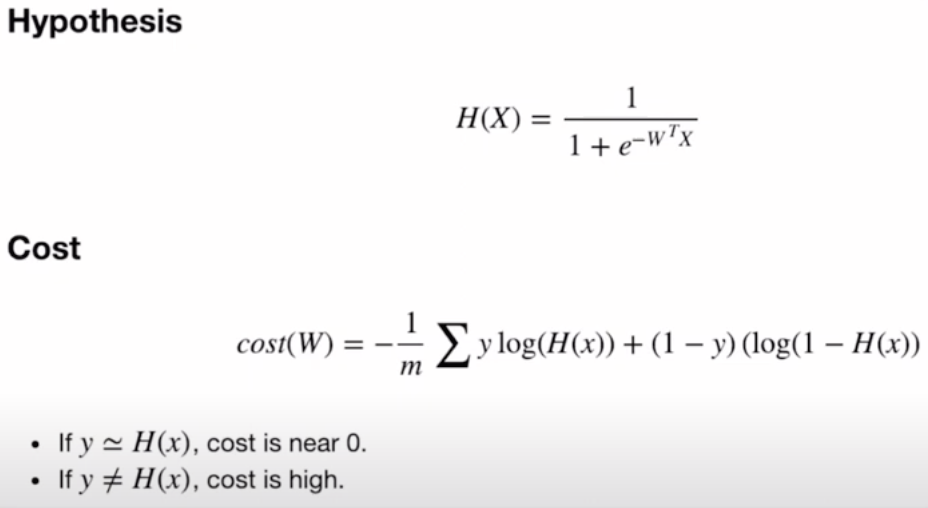

Weight Update via Gradient Descent

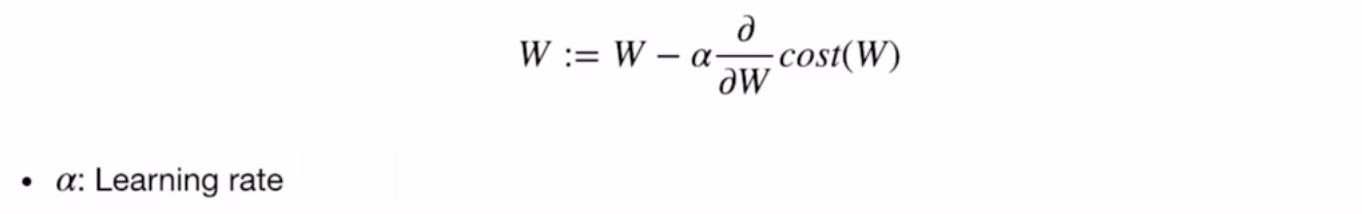

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

재현(reproducibility)을 위해 random seed

In [2]:
torch.manual_seed(1)

Training Data

In [4]:
X_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

|X_data| = (6,2) m=(데이터수)6, d(차원)=2

|y_data| = (6, )

In [41]:
X_train = torch.FloatTensor(X_data)
y_train = torch.FloatTensor(y_data)
print(X_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


Computing the Hypothesis (Sigmoid)
torch.exp()함수: exponential function 계산

In [6]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


torch.exp()사용해서 hypothesis function 쉽게 계산

In [8]:
W = torch.zeros((2,1), requires_grad=True) #gradient학습
b = torch.zeros(1, requires_grad=True)

X_train.matmul(W)는 X*W

In [9]:
hypothesis = 1/(1+torch.exp(-(X_train.matmul(W)+b)))

In [11]:
print(hypothesis)
print(hypothesis.shape) #H(x)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


Hypothesis계산

In [13]:
print('e^1 equals: ', torch.sigmoid(torch.FloatTensor([1])))

e^1 equals:  tensor([0.7311])


In [14]:
hypothesis = torch.sigmoid(X_train.matmul(W)+b)

In [15]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


Cost Function 계산 : hypothesis와 y_train의 차이

In [16]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


하나의 element에 대해서 loss계산

y_train[0]: 스칼라값

ypothesis[0]: 스칼라값 logP(X=1;W)

1-hypothesis[0]: logP(X=0;W) = 1-logP(X=1;W)

In [18]:
-(y_train[0] * torch.log(hypothesis[0])+
  (1-y_train[0]) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

전체 batch에 대해서 loss계산 (Cost Function)

In [19]:
losses = -(y_train * torch.log(hypothesis)+
          (1-y_train) * torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [20]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


BinaryCrossEntropy함수로 한번에 해결가능

In [21]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

Training Procedure

model

In [22]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

In [23]:
optimizer = optim.SGD([W, b], lr = 1)

In [24]:
nb_epochs = 1000
for epoch in range(nb_epochs+1):

  hypothesis = torch.sigmoid(X_train.matmul(W)+b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step() #cost값을 minimize하는 방향으로 W를 update

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


Evaluation

In [27]:
hypothesis = torch.sigmoid(X_train.matmul(W)+b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward0>)


구한 확률로 binary predictions(0 or 1)을 해야함

In [30]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


정확도 구하기

In [31]:
print(prediction[:5])
print(y_train[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [32]:
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


Implementation

In [42]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super(BinaryClassifier, self).__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    return self.sigmoid(self.linear(X))

In [43]:
model = BinaryClassifier()

In [44]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
  hypothesis = model(X_train) #H(x) 계산 P(X=1;W)
  cost = F.binary_cross_entropy(hypothesis, y_train) #cost계산

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item()/len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%' .format(
        epoch, nb_epochs, cost.item(), accuracy * 100
    ))

Epoch    0/100 Cost: 0.841201 Accuracy 50.00%
Epoch   10/100 Cost: 0.457889 Accuracy 66.67%
Epoch   20/100 Cost: 0.423259 Accuracy 83.33%
Epoch   30/100 Cost: 0.355104 Accuracy 83.33%
Epoch   40/100 Cost: 0.300464 Accuracy 83.33%
Epoch   50/100 Cost: 0.251668 Accuracy 83.33%
Epoch   60/100 Cost: 0.207725 Accuracy 100.00%
Epoch   70/100 Cost: 0.172860 Accuracy 100.00%
Epoch   80/100 Cost: 0.152507 Accuracy 100.00%
Epoch   90/100 Cost: 0.140916 Accuracy 100.00%
Epoch  100/100 Cost: 0.131552 Accuracy 100.00%
